# Exercício 2

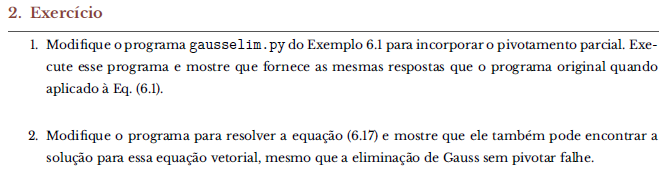

In [1]:
import numpy as np

## Alínea 1

In [2]:
def gausselim(Ao: np.ndarray, bbo: np.ndarray) -> np.ndarray:
    """
        Resolve o sistema de D equações definido por A * xx = bb usando eliminação gaussiana com pivotagem parcial.
    """

    # Evitar side effects
    A = np.copy(Ao)
    bb = np.copy(bbo)

    D = bb.size

    # Fazer pivotagem usando um mapa de endereços
    mm = np.arange(0, D)
    for line in range(D):
        # Posição do maior elemento da coluna (tendo em conta as trocas já feitas)
        coluna = A[mm[line:], line]
        index = list(coluna).index(max(coluna)) + line

        # Trocar os elementos
        mm[line], mm[index] = mm[index], mm[line]

    # Eliminação Gaussiana
    for i in range(D-1):
        for j in range(i+1, D):
            coef = A[mm[j]][i] / A[mm[i]][i]
            A[mm[j]] -= A[mm[i]] * coef
            bb[mm[j]] -= bb[mm[i]] * coef

    # Substituição Regressiva
    xx = np.zeros(D)
    xx[-1] = bb[mm[-1]] / A[mm[D-1]][D-1]
    for i in range(D-1, -1, -1):
        xx[i] = (bb[mm[i]] - (A[mm[i]][i+1:] @ xx[i+1:])) / A[mm[i]][i]
    
    return xx

In [3]:
# Parâmetros
VP = 5

A = np.array([[4, -1, -1, -1], [-1, 0, 3, -1], [-1, 3, 0, -1], [-1, -1, -1, 4]], dtype=np.float64)
bb = np.array([VP, VP, 0, 0], dtype=np.float64)

vv = gausselim(A, bb)
print(vv)

[3.         1.66666667 3.33333333 2.        ]


Obtermos o resultado correto!

## Alínea 2

In [4]:
A = np.array([[0, 1, 4, 1], [3, 4, -1, -1], [1, -4, 1, 5], [2, -2, 1, 3]], dtype=np.float64)
bb = np.array([4, 3, 9, 7], dtype=np.float64)

print(A)
print(bb)

vv = gausselim(np.copy(A), np.copy(bb))
print(vv)

vv = np.linalg.solve(A, bb)
print(vv)

[[ 0.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
[4. 3. 9. 7.]
[0.85714286 0.71428571 0.28571429 2.14285714]
[0.85714286 0.71428571 0.28571429 2.14285714]


In [5]:
A = np.array([[0, 1, 4, 1], [1, -4, 1, 5], [2, -2, 1, 3], [3, -6, -1, -1]], dtype=np.float64)
bb = np.array([4, 3, 9, 7], dtype=np.float64)

vv = gausselim(np.copy(A), np.copy(bb))
print(vv)

vv = np.linalg.solve(A, bb)
print(vv)

[4.66666667 1.         0.66666667 0.33333333]
[4.66666667 1.         0.66666667 0.33333333]
